<a href="https://colab.research.google.com/github/scanavi31/03MIAR--Python_para_IA/blob/main/01MAIR_ACT_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="/drive/my-drive/viu_logo.png" width="200">

## 01MIAR - Actividad Video Valenbici

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas 3 y 4, así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Las entregas sólo serán validas si se realizan a través del site de la asignatura: Actividades, Actividad Video.

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Entrega
- Convocatoria 1 - 12/12/2022
- Convocatoria 2 - 06/03/2023

#### Descripción
El conjunto de datos "estaciones_bici.csv" (fichero disponible en carpeta videos/res en drive) proviene de una descarga de datos del servicio web de la empresa municipal Valenbici, dedicada al alquiler de bicicletas en Valencia.

Los datos recabados de este servicio web son de mediciones cada 15 minutos de cada una de las estaciones disponibles:

http://www.valenbisi.es/service/carto/json

Cada estación está compuesta por un número variable de bornetas (total) donde se pueden anclar las bicicletas. Los datos obtenidos de cada estación (registros) refleja el número de bornetas libres (free) y el número de bicicletas disponibles (available).

http://www.valenbisi.es/service/stationdetails/valence/[número de estación]

#### Columnas para trabajar:
- station: id de la estación
- total: número total de bornetas
- download_date: timestamp de la descarga de datos
- available: número de bicis disponibles

#### Actividad
- 01 - Carga de datos de csv (estaciones_bici.csv) en un DataFrame
- 02 - Obtención del número de estaciones que tienen un total de 30 bornetas
- 03 - Número de estación con la media más alta de bicis disponibles
- 04 - Realizar el histograma de bicis disponibles de la estación del punto anterior
- 05 - Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

**DESARROLLO DE LA ACTIVIDAD**

***01 - Carga de datos de csv (estaciones_bici.csv) en un DataFrame***

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd

url = 'https://raw.githubusercontent.com/scanavi31/03MIAR--Python_para_IA/main/estaciones_bici.csv'
df = pd.read_csv(url,sep=';')
# Ver las primeras 5 filas
print(df.head())

   Unnamed: 0                       _id  available  connected  \
0           0  5c6050a42554172704fccdc0          9          1   
1           1  5c6050a42554172704fccdc1          6          1   
2           2  5c605be225541729b7d50885         20          1   
3           3  5c605be225541729b7d50886          6          1   
4           4  5c605be225541729b7d50887          9          1   

             download_date  station  free  open  ticket  total  \
0  2019-02-10 17:25:37.787       64    11     1       0     20   
1  2019-02-10 17:25:37.787       73    14     1       1     20   
2  2019-02-10 18:13:39.827       63     0     1       1     20   
3  2019-02-10 18:13:39.827       64    14     1       0     20   
4  2019-02-10 18:13:39.827       65    10     1       1     19   

                   updated  
0  2019-02-10 17:21:13.000  
1  2019-02-10 17:24:13.000  
2  2019-02-10 18:09:16.000  
3  2019-02-10 18:12:15.000  
4  2019-02-10 18:09:16.000  


***02 - Obtención del número de estaciones que tienen un total de 30 bornetas***

In [35]:
bornetas = df[df['total'] == 30]
num_bornetas = len(bornetas)
print("Número de estaciones con un total de 30 bornetas:", num_bornetas)


Número de estaciones con un total de 30 bornetas: 1098


***03 - Número de estación con la media más alta de bicis disponibles***

In [36]:
estaciones_por_media = df.groupby('station')['available'].mean().reset_index()
estacion_media_alta = estaciones_por_media.sort_values('available', ascending=False).iloc[0]['station']
print("Número de estación con la media más alta de bicis disponibles:", estacion_media_alta)


Número de estación con la media más alta de bicis disponibles: 50.0


***04 - Realizar el histograma de bicis disponibles de la estación del punto anterior***

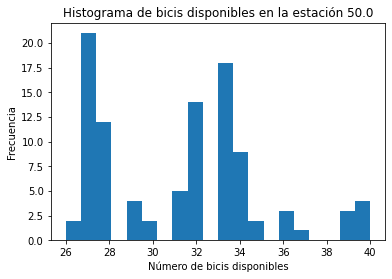

In [37]:
import matplotlib.pyplot as plt

estacion_seleccionada = df[df['station'] == estacion_media_alta]
bicis_disponibles = estacion_seleccionada['available']
plt.hist(bicis_disponibles, bins=20)
plt.xlabel('Número de bicis disponibles')
plt.ylabel('Frecuencia')
plt.title('Histograma de bicis disponibles en la estación {}'.format(estacion_media_alta))
plt.show()


***05 - Realizar gráfica con la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha***

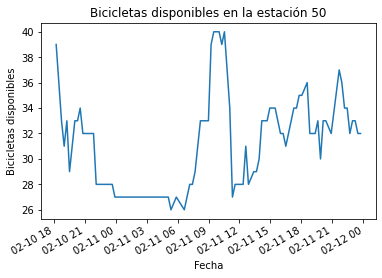

In [38]:
# Seleccionar solo las filas correspondientes a la estación 50
df = df[df['station'] == 50.0]

# Establecer la columna "download_date" como índice y convertirla a un objeto de fecha y hora
df = df.set_index(pd.to_datetime(df['download_date']))

# Trazar la columna "available"
df['available'].plot()

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Bicicletas disponibles')
plt.title('Bicicletas disponibles en la estación 50')
plt.show()